In [22]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random

In [138]:
img = cv.imread('Lenna.png',0)
cv.imshow('Lenna', img)

im = cv.imread('Lenna.png')

cv.waitKey(0)
cv.destroyAllWindows()

### 1.	fourier(I, t, ptOut): Given an image I as input, the method will show the Fourier spectrum of the entire image if t = 0 or of a patch of random size and position if t = 1.

In [139]:
def fourier(I, t=0, ptOut=None):
    img_data = np.asarray(I)
    fourier = np.fft.fft2(img_data) #calculates fourier img
    fourier = np.fft.fftshift(fourier) # shifts high freq to center
    fourier = abs(fourier)
    fourier = np.log10(fourier) # normalizes values in logarithmic form
    if t == 0:
        plt.imshow(fourier, cmap='gray')
        print(fourier)
    else:
        h0 = random.randint(0, img_data.shape[0]//2)
        h1 = random.randint(img_data.shape[0]//2, img_data.shape[0])
        w0 = random.randint(0, img_data.shape[0]//2)
        w1 = random.randint(img_data.shape[0]//2, img_data.shape[0])
        img_data1 = img_data[h0:h1,w0:w1]
        fourier = np.fft.fft2(img_data1) #calculates fourier img
        fourier = np.fft.fftshift(fourier) # shifts high freq to center
        fourier = abs(fourier)
        fourier = np.log10(fourier) # normalizes values in logarithmic form
        plt.imshow(fourier, cmap='gray')
    if ptOut != None:
        cv.imwrite(ptOut, 'img.jpg')

[[2.01703334 2.60358292 2.14823682 ... 2.64428919 2.14823682 2.60358292]
 [2.45781155 2.68785022 2.87948839 ... 2.17180857 1.80015987 2.2749085 ]
 [1.85383738 2.0420984  2.55666143 ... 2.61781284 2.44829989 2.51856615]
 ...
 [2.78806489 2.51159103 2.69945699 ... 2.02491814 2.54639417 2.73586308]
 [1.85383738 2.51856615 2.44829989 ... 2.74927577 2.55666143 2.0420984 ]
 [2.45781155 2.2749085  1.80015987 ... 2.69842142 2.87948839 2.68785022]]


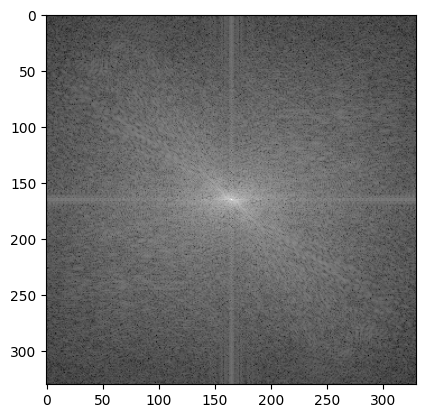

In [140]:
fourier(img, 0)

### 2.	RGB2YCbCr(I, ptOut): Given an image I as input:

a.	extract the RGB channels and convert them to YCbCr using the formulas given in the slides;

b.	Convert the image using the following code
imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

c.	Compare the results by showing the 6 outputs using matplotlib (with subplots of 2 rows and 3 columns)


In [117]:
def RGB2YBbCr(I, ptOut=None):
    B, G, R = cv.split(I)
    Y = 0.299*R + 0.587*G + 0.114*B
    U = 0.564*(B - Y) 
    V = 0.713*(R - Y)
    Cb = U + 128
    Cr = V + 128

    new_im = cv.merge((Y,Cb,Cr))

    imgYCC = cv.cvtColor(I, cv.COLOR_BGR2YCR_CB)

    fig = plt.figure()
    plt.subplot(2,3,1)
    plt.imshow(Y, cmap='gray')
    plt.subplot(2,3,2)
    plt.imshow(Cb, cmap='gray')
    plt.subplot(2,3,3)
    plt.imshow(Cr, cmap='gray')

    fig = plt.figure()
    plt.subplot(2,3,4)
    plt.imshow(imgYCC[:,:,0], cmap='gray')
    plt.subplot(2,3,5)
    plt.imshow(imgYCC[:,:,2], cmap='gray')
    plt.subplot(2,3,6)
    plt.imshow(imgYCC[:,:,1], cmap='gray')

    return imgYCC, new_im



(array([[[162, 174, 107],
         [161, 172, 111],
         [161, 172, 108],
         ...,
         [171, 172, 101],
         [167, 172, 101],
         [136, 178, 105]],
 
        [[162, 174, 107],
         [161, 172, 111],
         [161, 172, 108],
         ...,
         [170, 172, 101],
         [166, 172, 101],
         [135, 178, 106]],
 
        [[162, 174, 107],
         [161, 172, 111],
         [161, 172, 108],
         ...,
         [173, 172, 101],
         [171, 171, 100],
         [140, 179, 104]],
 
        ...,
 
        [[ 49, 157, 136],
         [ 48, 157, 135],
         [ 50, 157, 135],
         ...,
         [ 94, 175, 119],
         [ 98, 178, 116],
         [ 93, 178, 119]],
 
        [[ 42, 157, 137],
         [ 48, 158, 134],
         [ 51, 159, 134],
         ...,
         [101, 178, 118],
         [103, 179, 115],
         [101, 181, 116]],
 
        [[ 43, 155, 135],
         [ 50, 157, 134],
         [ 53, 158, 134],
         ...,
         [103, 180, 116],
  

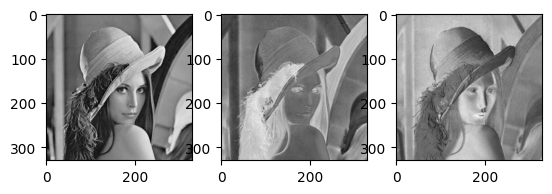

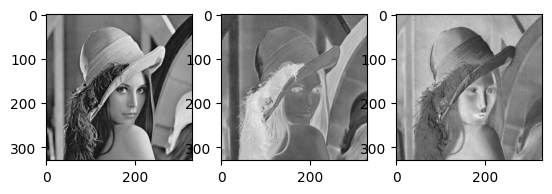

In [137]:
RGB2YBbCr(im)

#B, G, R = cv.split(im)

#print(B.flatten())

### 3.	Zero-blocks(I): Divide the image into 2x2 size blocks. Multiply by 0 all blocks whose sum of pixel values is even.

In [129]:
def Zero_blocks(I):
    img = I
    ht, wdt = img.shape
    for i in range(0,wdt-1,2):
        for j in range(0,ht-1,2):
            if (img[i,j] + img[i+1,j] + img[i,j+1] + img[i+1,j+1]) % 2 == 0:
                img[i,j] =0 
                img[i+1,j] = 0 
                img[i,j+1]= 0 
                img[i+1,j+1] = 0
        
    plt.imshow(img, cmap='gray')




C:\Users\Utente\AppData\Local\Temp\ipykernel_13796\1255315230.py:6: RuntimeWarning: overflow encountered in scalar add
  if (img[i,j] + img[i+1,j] + img[i,j+1] + img[i+1,j+1]) % 2 == 0:


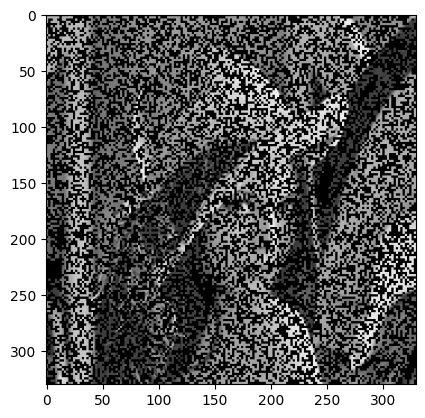

In [130]:
Zero_blocks(img)